In [1]:
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import sys
from urllib.parse import urlparse
import warnings

sys.path.append(os.path.abspath("../../../visualizations/"))
from sankey import make_sankey_graph
warnings.filterwarnings('ignore')

# LOAD DATA

In [2]:
with open("data/FIL_RetroPGF1_applications.json") as f:
    app_data = json.load(f)

In [3]:
results = pd.read_csv('data/FIL-RetroPGF-1 Allocation Results - allocation_results.csv')
results = results[['FIL Allocated', 'Project URL']]
results.rename(columns={'FIL Allocated': 'fil_allocated', 'Project URL': 'project_url'}, inplace=True)
results['project_id'] = results['project_url'].apply(lambda x: x.split('/')[-1])
results.set_index('project_id', inplace=True)
results.tail(1)

,fil_allocated,project_url
project_id,,
0x6823dcbb2af114256b7f56071c8239f863284ebc58cff0bb4aff10ee8223ff39,0,https://fil-retropgf.io/projects/0x6823dcbb2af...


In [4]:
projects = pd.read_csv('data/FIL_RetroPGF1_projects_with_votes.csv')
projects.set_index('id', inplace=True)
projects['github_links_app'] = projects['github_links_app'].apply(eval)
projects['github_repos_oso'] = projects['github_repos_oso'].apply(eval)

categories = projects['category'].apply(eval).str.join('|').str.get_dummies()
projects = projects.join(categories)
projects.tail(1)

,name,bio,contribution,impact,category,github_links_app,github_repos_oso,github_repos_count,fork_count,star_count,first_commit,last_commit,amount,COMMUNITY_EDUCATION,END_USER_EXPERIENCE,GOVERNANCE,INFRASTRUCTURE,Other,RESEARCH_AND_DEVELOPMENT,TOOLING
id,,,,,,,,,,,,,,,,,,,,
0x1995fc8da5b940c5e75cce7d7a8626c6bd3ad5175efc27d19899187caed8d67b,南山居士Hill,An industry news and education platform focusi...,Contribution: October 2023 to March 2024: 510 ...,"IPFS及Filecoin价值资讯传递，Founded on October 20, 202...","['END_USER_EXPERIENCE', 'COMMUNITY_EDUCATION',...",[],[],0,0,0,NaN,NaN,"[2, 1, 4, 1, 3, 5, 1, 1]",1,1,0,0,1,0,0


In [5]:
df = results.join(projects)
df['has_github_in_app'] = df['github_links_app'].apply(lambda x: len(x)>0)
df['verified_github'] = df['github_repos_oso'].apply(lambda x: len(x)>0)
df.tail(1)

,fil_allocated,project_url,name,bio,contribution,impact,category,github_links_app,github_repos_oso,github_repos_count,...,amount,COMMUNITY_EDUCATION,END_USER_EXPERIENCE,GOVERNANCE,INFRASTRUCTURE,Other,RESEARCH_AND_DEVELOPMENT,TOOLING,has_github_in_app,verified_github
project_id,,,,,,,,,,,,,,,,,,,,,
0x6823dcbb2af114256b7f56071c8239f863284ebc58cff0bb4aff10ee8223ff39,0,https://fil-retropgf.io/projects/0x6823dcbb2af...,Multichain.storage,Multi-Chain storage (MCS) is a web3 vesrion of...,Multi-chain Storage is a chain-based storage a...,"Over the past six months, Multi-chain Storage ...","['INFRASTRUCTURE', 'TOOLING', 'GOVERNANCE']","[filswan/go-mcs-sdk, filswan/js-mcs-sdk, filsw...",[],0,...,"[2, 0, 4, 1]",0,0,1,1,0,0,1,True,False


In [6]:
for cat in categories.columns:
    print(cat, len(df[df[cat]==1]))

COMMUNITY_EDUCATION 34
END_USER_EXPERIENCE 17
GOVERNANCE 14
INFRASTRUCTURE 36
Other 6
RESEARCH_AND_DEVELOPMENT 25
TOOLING 36


# PLOTTING VARS

In [7]:
COLOR1 = "#2C7FB8"
COLOR2 = "#99D8C9"
VALUE_COL = 'fil_allocated'
UNIT = 'FIL'

plt.rcParams['figure.dpi'] = 144
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor']= 'white'
plt.rcParams['savefig.facecolor']= 'white'
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.sans-serif'] = ['Helvetica', 'Arial', 'sans-serif']

# PROJECT ALLOCATIONS

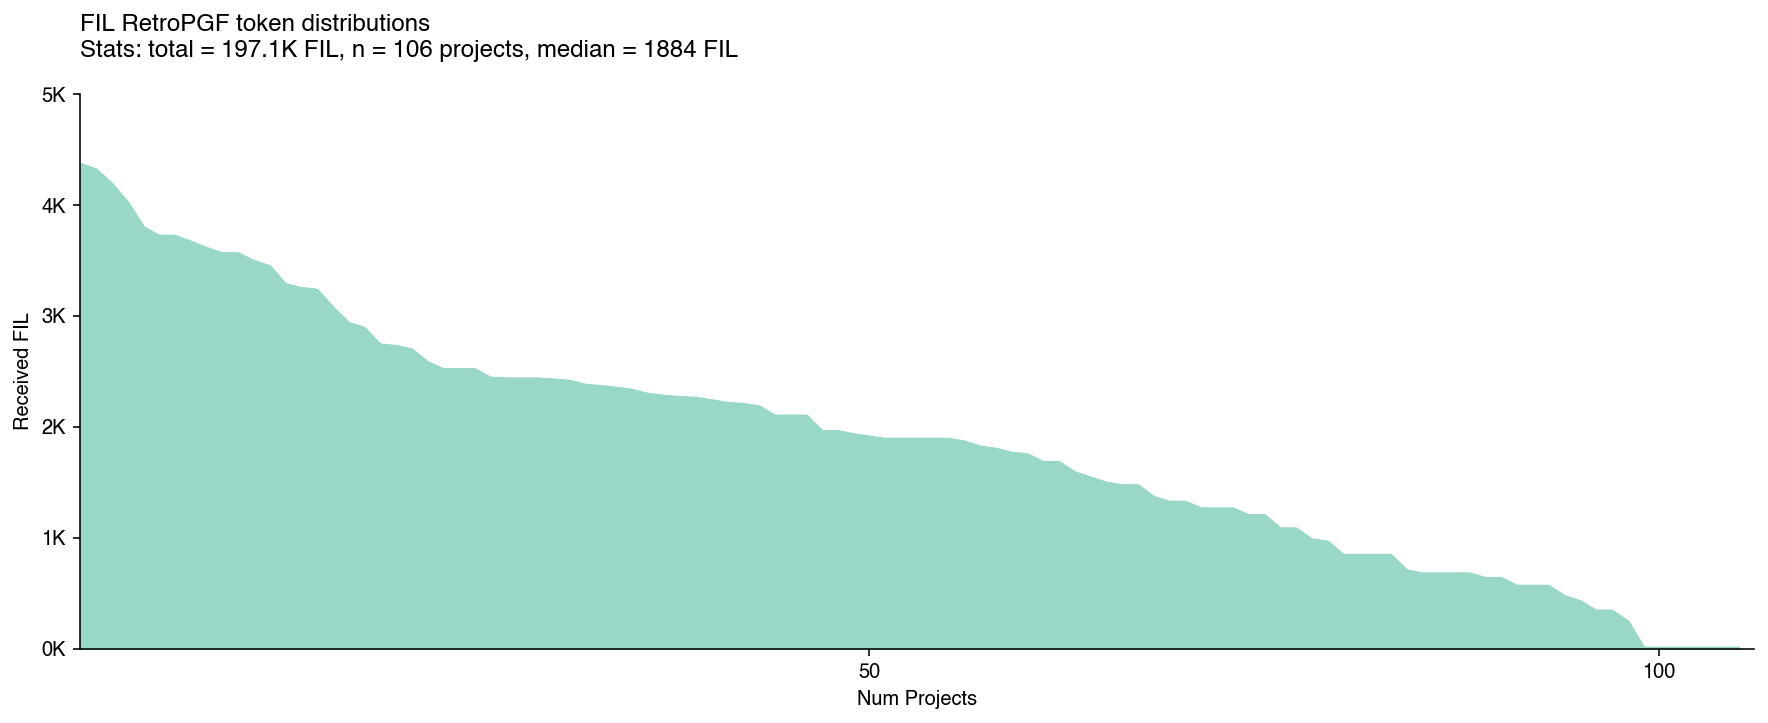

In [8]:
# make a pretty chart
def dist_chart(dataframe, title):
    
    n = len(dataframe)
    median = dataframe[VALUE_COL].median()
    total = dataframe[VALUE_COL].sum() / 1_000
    title += f'\nStats: total = {total:,.1f}K {UNIT}, n = {n} projects, median = {median:.0f} {UNIT}\n'
    
    fig, ax = plt.subplots(facecolor='white', figsize=(15,5))
    (dataframe[VALUE_COL]/1000).plot(kind='area', lw=2, color=COLOR2)
    
    ax.set_xlim(0, n)
    step = 10 if n < 100 else 50
    xticks = [x for x in range(step, n, step)]
    ax.set_xticks(xticks, xticks)
    ax.set_xlabel("Num Projects")
    
    max_y = int(dataframe[VALUE_COL].max()/1000) + 1
    ax.set_ylim(0, max_y)
    ytickvals = ax.get_yticks()
    yticklabs = [y.get_text() + 'K' for y in ax.get_yticklabels()]
    ax.set_yticks(ytickvals, labels=yticklabs)
    ax.set_ylabel(f"Received {UNIT}")
    
    ax.set_title(title, loc='left')

    path = f"img/{title}.png"
    fig.savefig(path)
    
# arrange the data and title for the chart
def plot_distribution(consolidated_df, filter_col=None, filter_val=None):
    
    dataframe = consolidated_df#[consolidated_df[VALUE_COL]>1]
    title = f'{UNIT} RetroPGF token distributions'
    if filter_col:
        title += f": '{filter_col.replace('_',' ').title()}' projects only"
        if filter_val:
            if isinstance(filter_val, str):
                dataframe = consolidated_df[consolidated_df[filter_col]==filter_val]
            else:
                dataframe = consolidated_df[consolidated_df[filter_col]>=filter_val]
                
        else:
            dataframe = consolidated_df[consolidated_df[filter_col].isin([1,True])]
        
    dist_chart(dataframe, title)

# the overall distribution    
plot_distribution(df)    

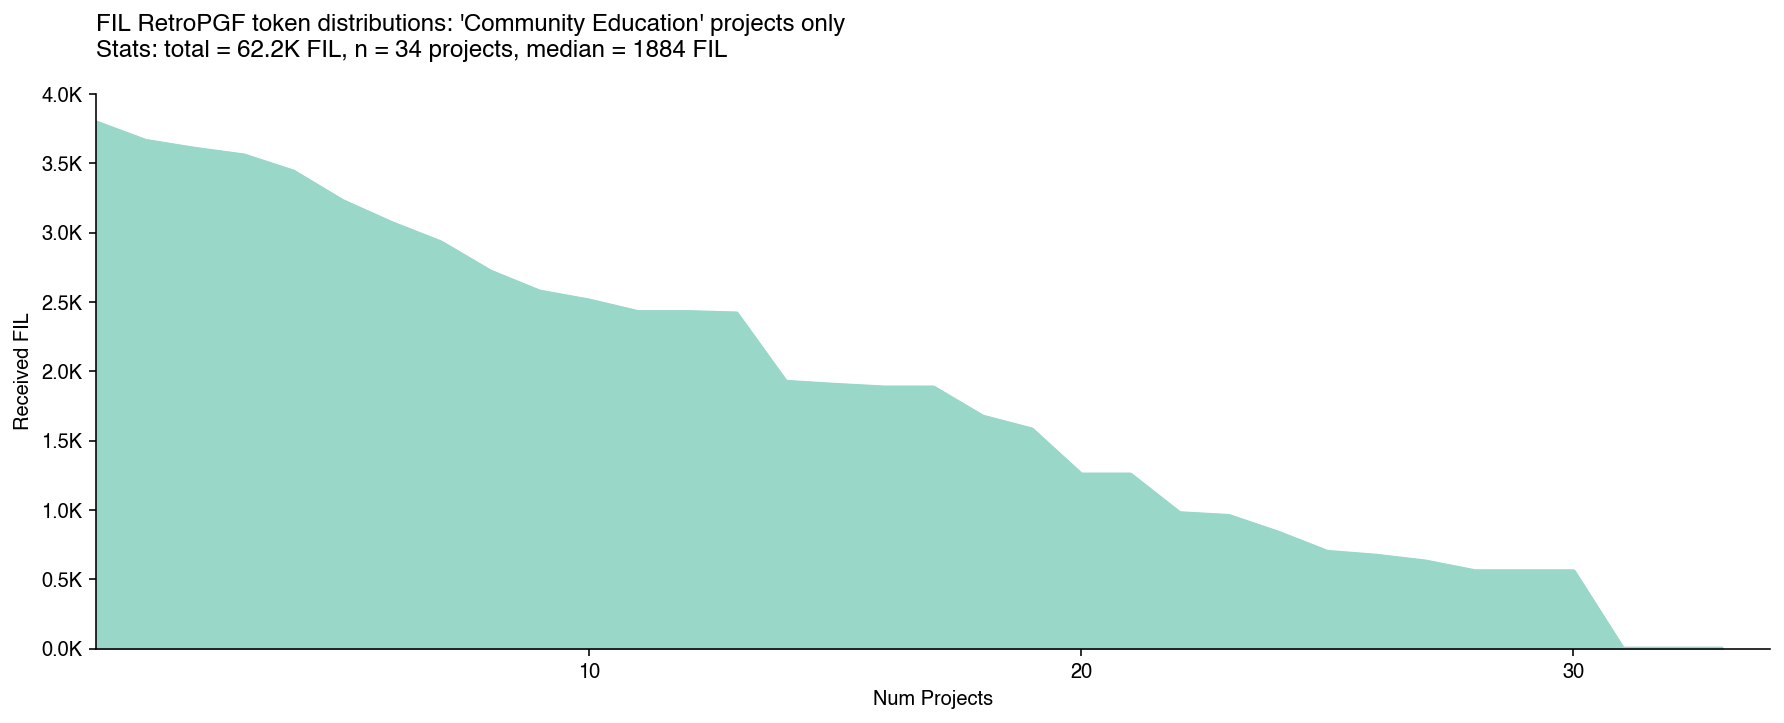

In [9]:
plot_distribution(df, 'COMMUNITY_EDUCATION', 1)    

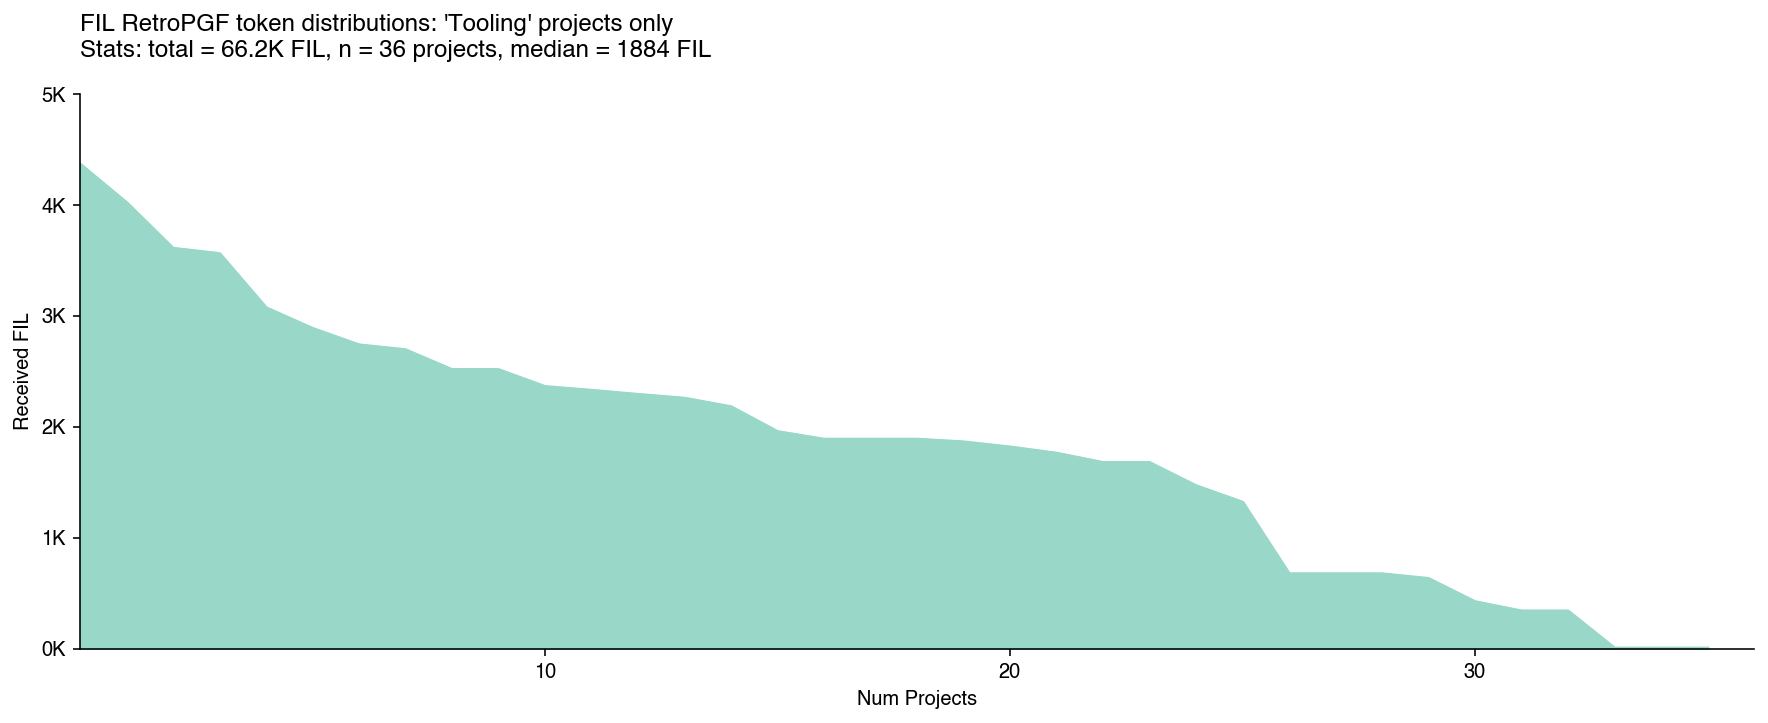

In [10]:
plot_distribution(df, 'TOOLING', 1)    

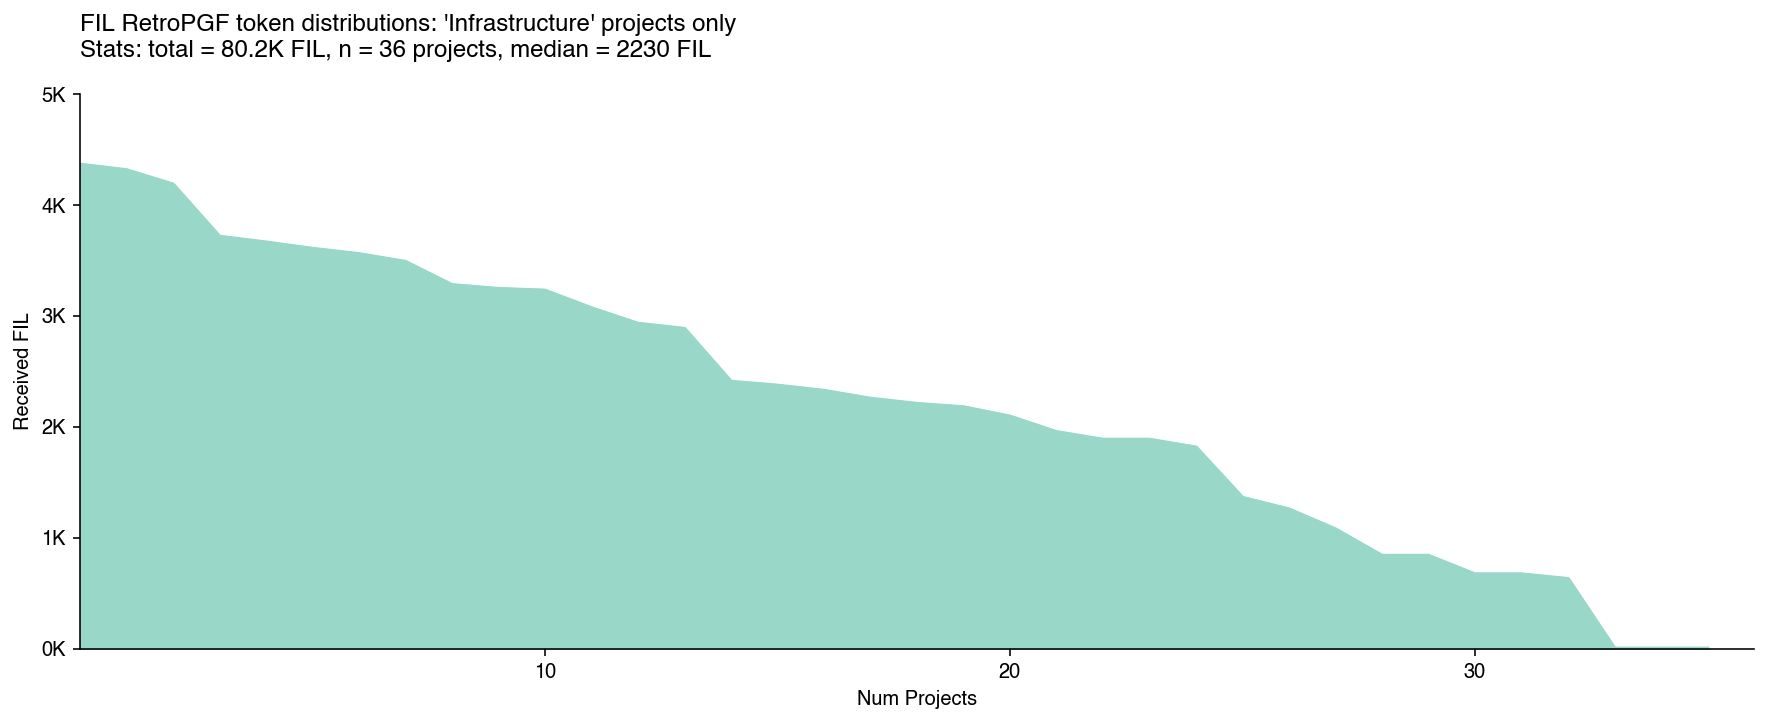

In [11]:
plot_distribution(df, 'INFRASTRUCTURE', 1)    

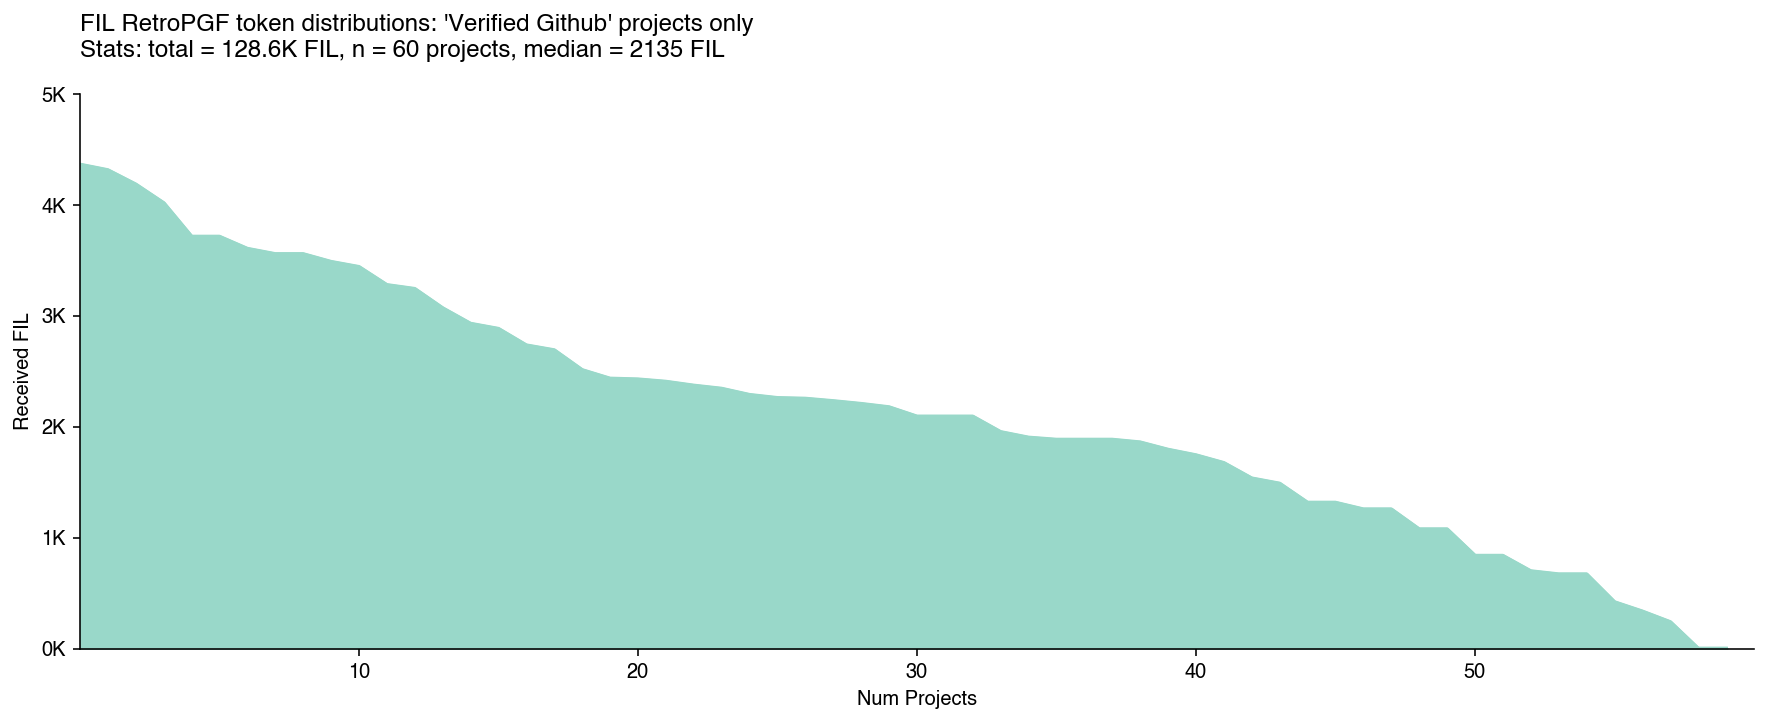

In [12]:
plot_distribution(df, 'verified_github', True)

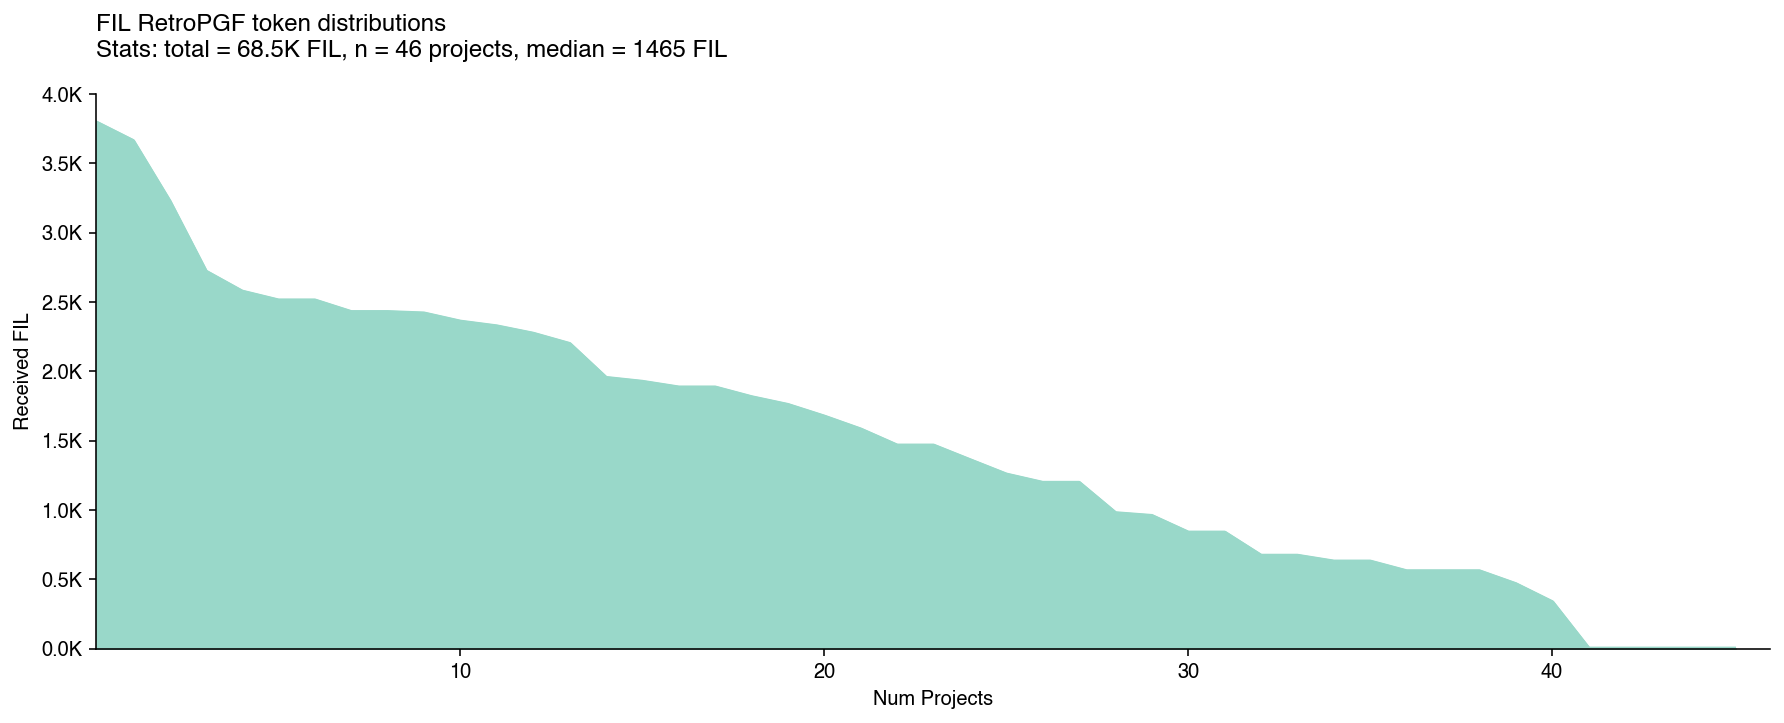

In [13]:
plot_distribution(df[df['verified_github']==False])

# VOTING DISTRIBUTIONS

In [14]:
df_votes = df[['name', 'category', 'amount', VALUE_COL]].copy()
df_votes.head(1)

,name,category,amount,fil_allocated
project_id,,,,
0x005bcf117de0884513333371a7061d3cc87ea946c4b8507063a0fb8c26879b63,Glif Nodes & RPC API service,"['INFRASTRUCTURE', 'TOOLING']","[1, 3, 4, 3, 0, 6, 4, 5, 3, 9, 7, 8, 15, 5]",4365


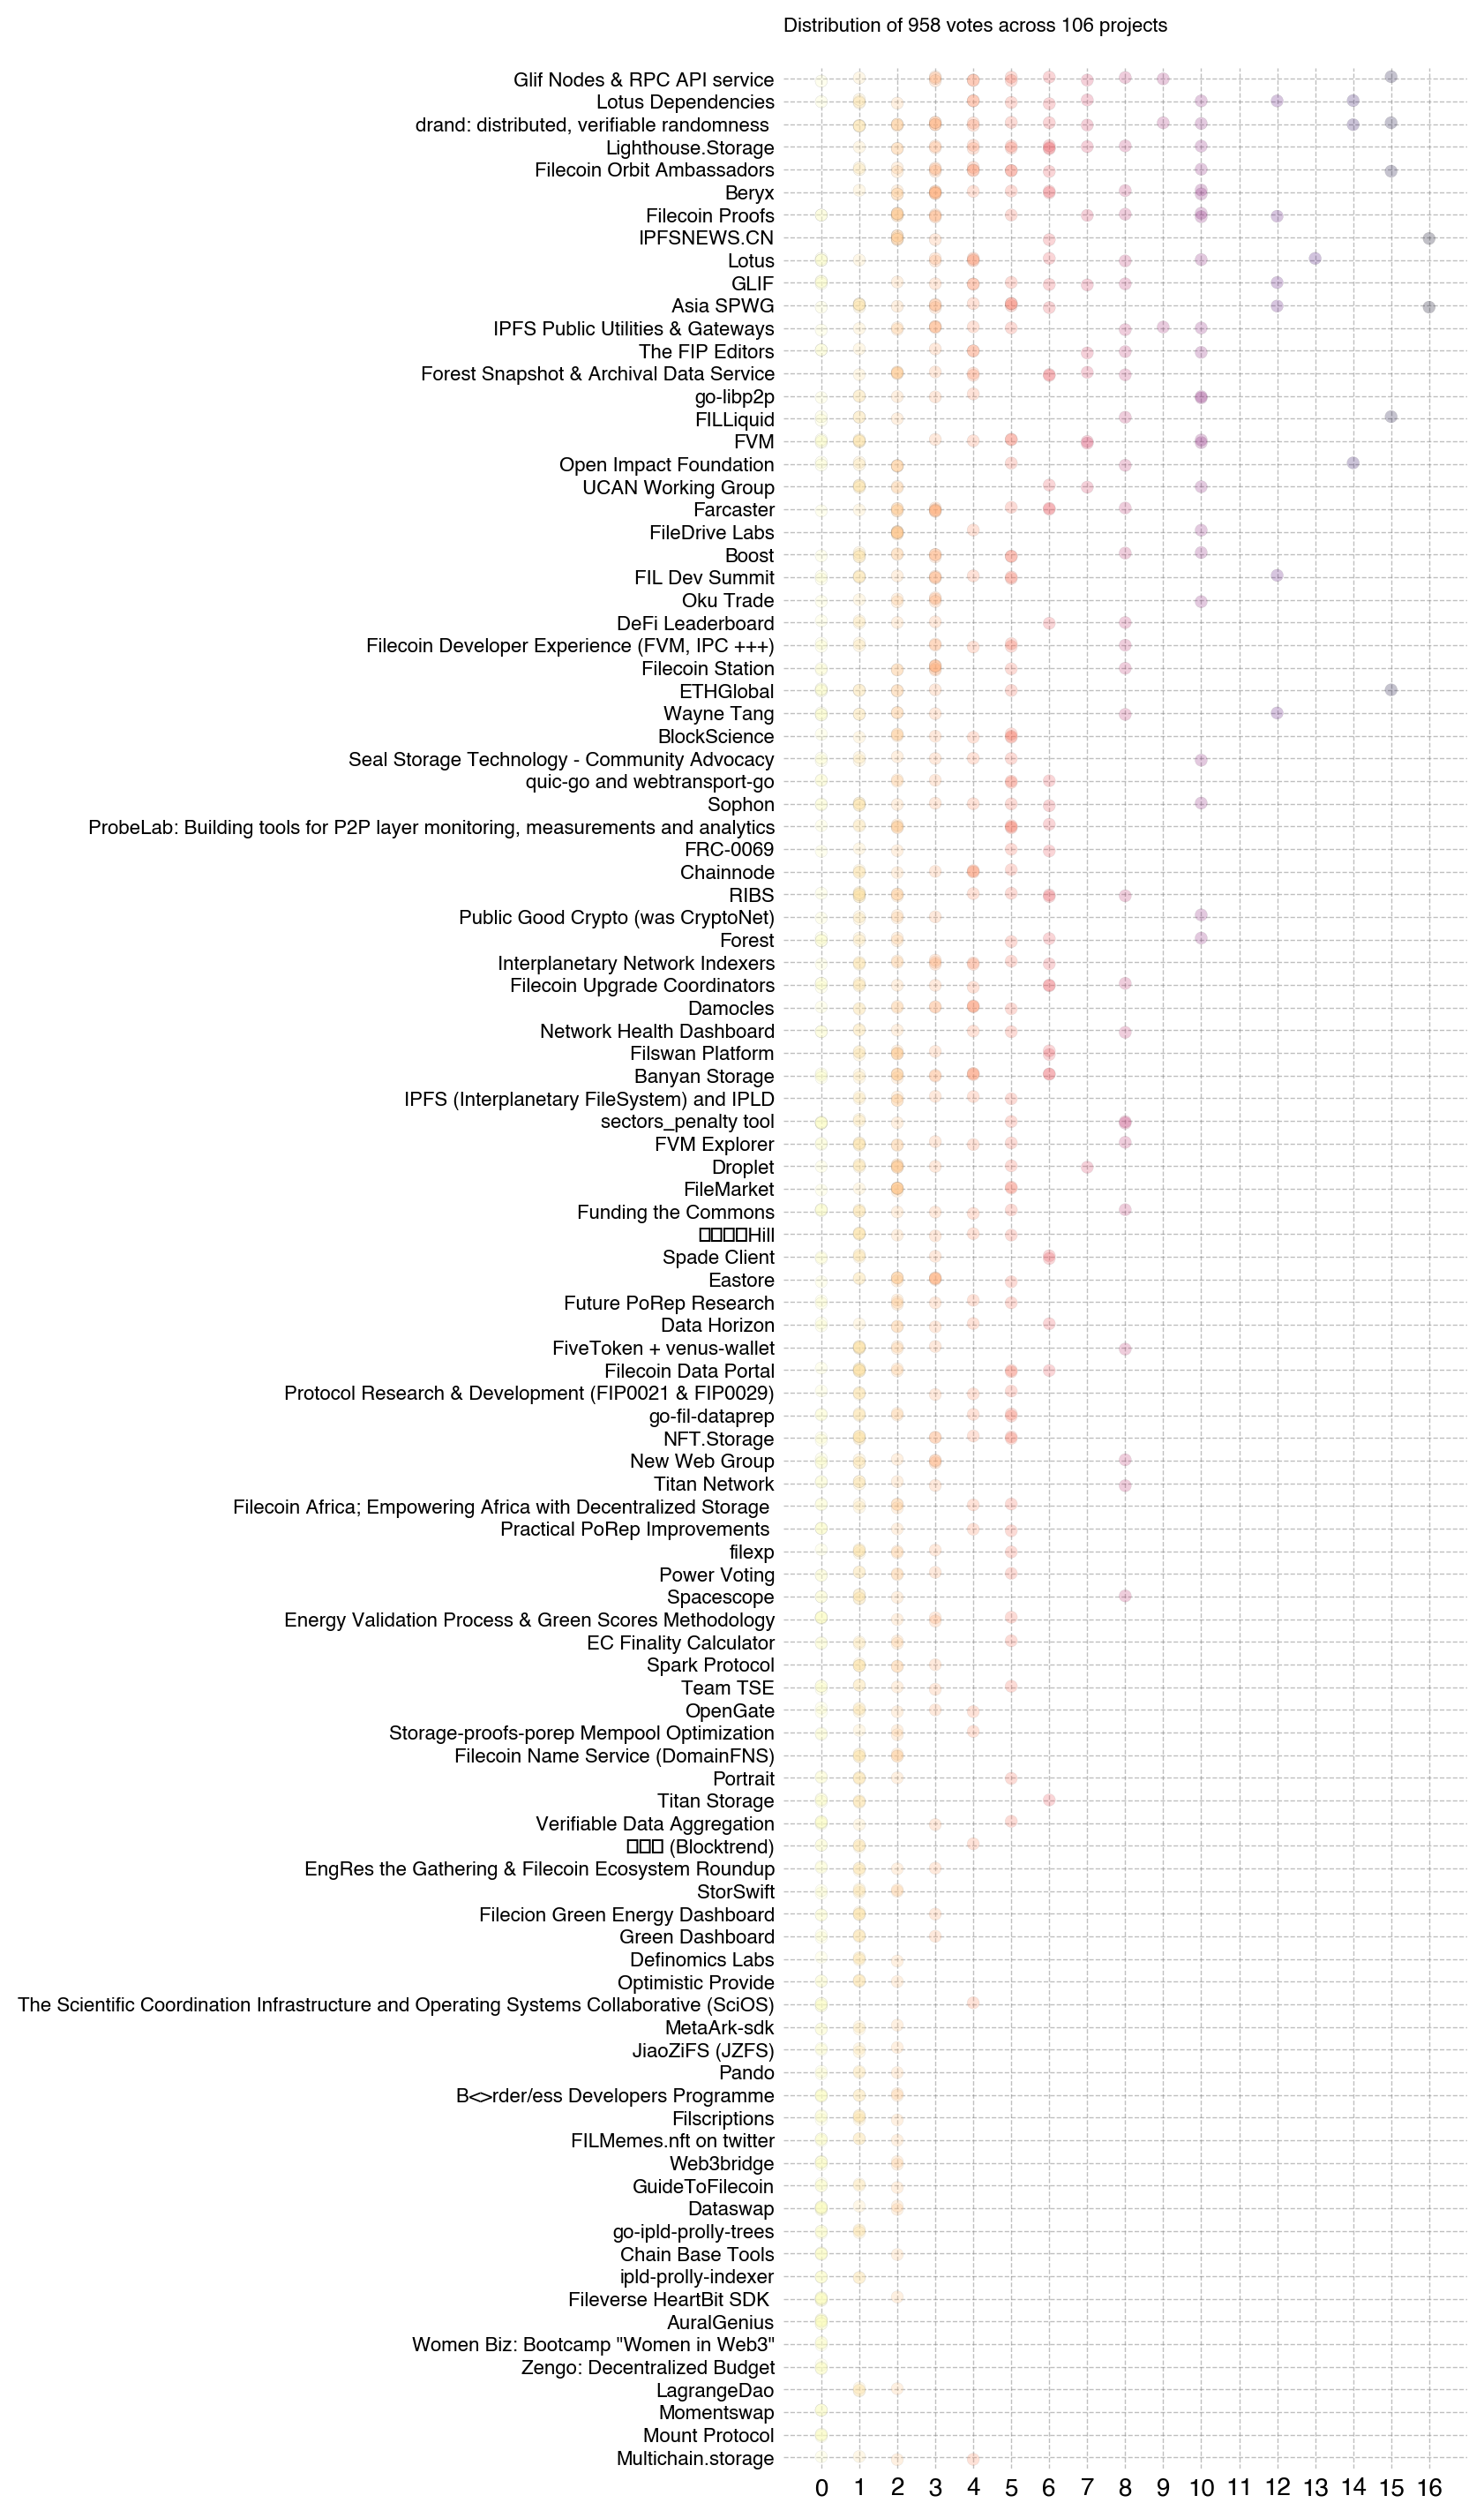

In [15]:
def stripplot(category, sort_by='name'):
    
    dff = df_votes.copy()
    if category:
        dff['is_in'] = dff['category'].apply(lambda x: category in x)
        dff = dff[dff['is_in'] == True]

    n = len(dff['name'].unique())
    
    if sort_by != 'name':
        dff['rank'] = df_votes[VALUE_COL].rank()
        dff.sort_values(by='rank', ascending=False, inplace=True)
        
    votes = []
    for _,row in dff.iterrows():
        for v in eval(row['amount']):
            votes.append({'name': row['name'], 'vote': v})
    dfff = pd.DataFrame(votes)
    
    fig, ax = plt.subplots(figsize=(5,n/6), dpi=200, facecolor='white')
    sns.stripplot(
        dfff, 
        y='name', 
        x='vote', 
        hue='vote', 
        palette='magma_r',
        hue_norm=(0,17),
        orient='h', 
        alpha=.25, 
        linewidth=.1,
        legend=False,
        dodge=0
    )
    ax.set_xlim(-1,17)

    for lbl in ax.get_yticklabels():
        p = lbl.get_text()
        y = lbl.get_position()[1]
        right = len(dfff[(dfff['name']==p) & (dfff['vote']==500_000)])
        if right:
            ax.text(s=right, x=510_000, y=y, ha='left', va='center', fontsize=6)
        left = len(dfff[(dfff['name']==p) & (dfff['vote']==0.1)])
        if left:
            ax.text(s=left, x=-10_000, y=y, ha='right', va='center', fontsize=6)

    ax.grid(color='grey', linestyle='--', linewidth=.5)        
    ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
    ax.tick_params(direction='out', length=0, width=.5, grid_alpha=0.5)
    
    title = f"Distribution of {len(dfff):,} votes across {n} projects\n"
    ax.set_title(title, loc='left', fontsize=8, weight='bold')
    ax.set_xlabel("")
    ax.set_xticks(list(range(0,17)))
    plt.yticks(fontsize=8)
    ax.set_ylabel("")
    
    path = f"img/vote_distribution.png"
    fig.savefig(path)
    
    return votes

v = stripplot(None)

In [16]:
vv = pd.DataFrame(v)
vv[vv['vote']>0]['vote'].describe()

count    751.000000
mean       3.327563
std        2.781707
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       16.000000
Name: vote, dtype: float64

# ANALYZE APPLICATIONS LINKS

886


Text(0.0, 1.0, 'Count of projects that submitted at least one link from this domain')

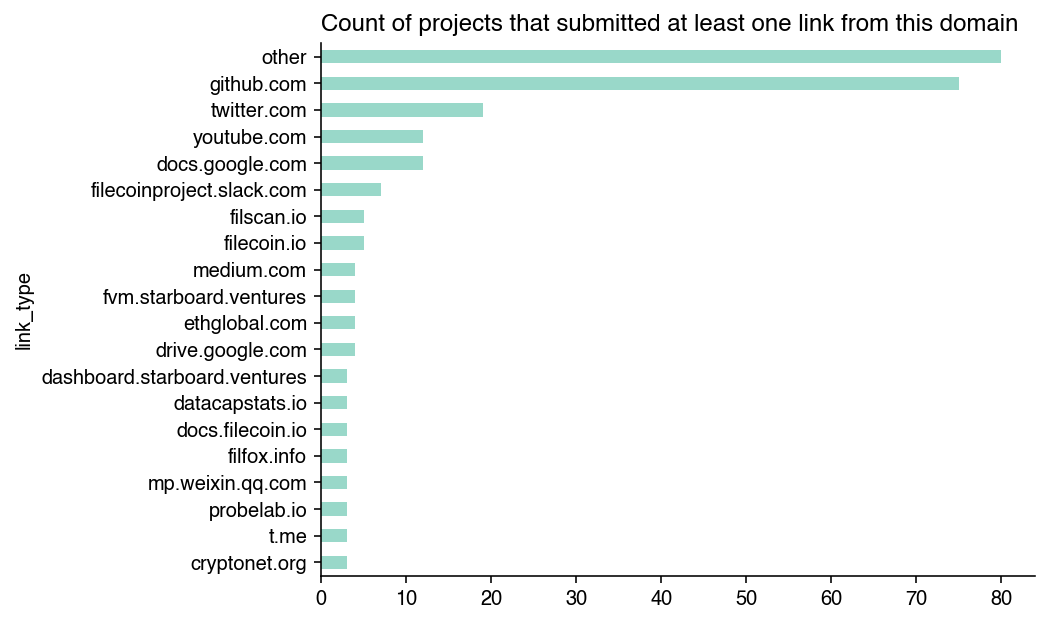

In [17]:
links = []
for app in app_data:
    for link in app['app'].get('contributionLinks', []):
        links.append({
            'id': app['id'],
            'type': 'contribution',
            'url': link['url']
        })
    for link in app['app'].get('impactMetrics', []):
        links.append({
            'id': app['id'],
            'type': 'impact_metric',
            'url': link['url']
        })
        
links_df = pd.DataFrame(links)

links_df['domain'] = links_df['url'].apply(lambda x: urlparse(x).netloc)
links_df['domain'] = links_df['domain'].str.replace('x.com', 'twitter.com')
links_df['domain'] = links_df['domain'].str.replace('youtu.be', 'www.youtube.com')
links_df['domain'] = links_df['domain'].str.replace('www.', '')

link_counts = links_df.groupby('domain')['id'].nunique().sort_values()
top_links = list(link_counts[link_counts>2].index)

links_df['link_type'] = links_df['domain'].apply(lambda x: x if x in top_links else 'other')

print(len(links_df))
f = links_df.groupby('link_type')['id'].nunique().sort_values().plot(kind='barh', color=COLOR2)
f.set_title('Count of projects that submitted at least one link from this domain', loc='left')

Text(0.0, 1.0, 'Count of domains across all links submitted by projects')

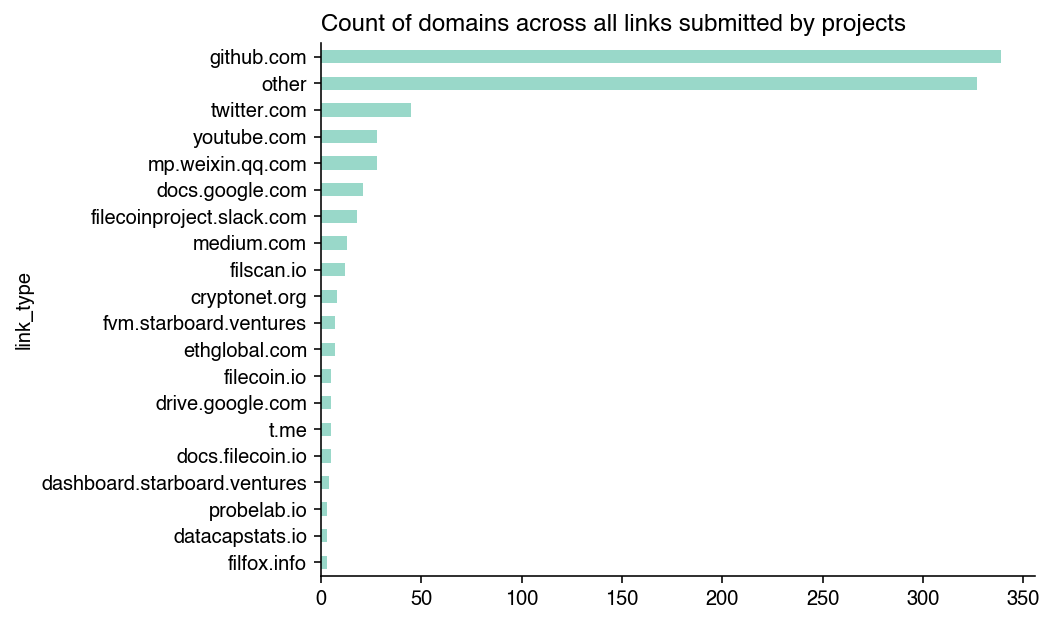

In [18]:
f = links_df.groupby('link_type')['id'].count().sort_values().plot(kind='barh', color=COLOR2)
f.set_title('Count of domains across all links submitted by projects', loc='left')

# REPOS ANALYSIS

In [19]:
commit_stats = pd.read_csv('data/FIL_RetroPGF1_commits.csv', index_col=0)
commit_stats['year'] = commit_stats['bucket_day'].apply(lambda x: x[:4])
commit_stats['month'] = commit_stats['bucket_day'].apply(lambda x: x[5:7])

mads = (
    commit_stats
    .groupby(['from_artifact_id', 'year', 'month', 'to_artifact_id'])['bucket_day']
    .nunique()
    .reset_index()
)
mads = mads[mads['bucket_day'] >= 3]
devs = mads.groupby('to_artifact_id')['from_artifact_id'].count()

devs.name = 'developer_months'

repo_stats = (
    pd
    .read_csv('data/FIL_RetroPGF1_repo_snapshot.csv', index_col=0)
    .set_index('artifact_id')
    .join(devs)
    .set_index('repo_name_with_owner')
)
repo_stats.tail(1)

,project_id,artifact_namespace,artifact_name,is_fork,fork_count,star_count,watcher_count,language,license_spdx_id,first_commit_time,last_commit_time,days_with_commits_count,contributors_to_repo_count,developer_months
repo_name_with_owner,,,,,,,,,,,,,,
ipfs/notes,_-S_4OPQhIH4TID_hmmAA5OXTOHKI4iN4pvDgt3elQk=,ipfs,notes,False,33,400,400,NaN,MIT,2015-10-05 00:32:21.000000 UTC,2022-07-21 09:55:33.000000 UTC,20.0,7.0,NaN


In [20]:
sankey_data = []
for _,p in df.iterrows():
    for repo in p['github_repos_oso']:
        sankey_data.append({
            'Project Application': p['name'],
            'GitHub Org': repo.split('/')[0],
            'GitHub Repo': repo,
            'Developer Months': repo_stats.loc[repo, 'developer_months'],
            'Funding': p[VALUE_COL]
        })
    
sankey_df = pd.DataFrame(sankey_data)    

sankey_df['Developers Share'] = (
    sankey_df['Developer Months']
    / sankey_df.groupby('GitHub Repo')['Project Application'].transform('count')
).fillna(0)

sankey_df['Funding Share'] = (
    sankey_df['Funding']
    / sankey_df.groupby('Project Application')['GitHub Repo'].transform('count')
).fillna(0)

sankey_df.head()

,Project Application,GitHub Org,GitHub Repo,Developer Months,Funding,Developers Share,Funding Share
0,Glif Nodes & RPC API service,data-preservation-programs,data-preservation-programs/retrievalbot,3.0,4365,3.0,1091.25
1,Glif Nodes & RPC API service,glifio,glifio/filecoin-chart,21.0,4365,10.5,1091.25
2,Glif Nodes & RPC API service,glifio,glifio/filecoin-docker,3.0,4365,1.5,1091.25
3,Glif Nodes & RPC API service,glifio,glifio/filecoin-iac,25.0,4365,12.5,1091.25
4,Lotus Dependencies,quic-go,quic-go/quic-go,34.0,4315,17.0,4315.00


In [21]:
sankey_df.groupby('GitHub Repo')['Project Application'].nunique().sort_values(ascending=False).head(20)

GitHub Repo
filecoin-project/fips              11
filecoin-project/lotus              5
filecoin-project/ref-fvm            3
filecoin-project/community          2
filecoin-station/core               2
filecoin-station/desktop            2
filecoin-station/zinnia             2
quic-go/quic-go                     2
titannet-dao/titan-node             2
filecoin-project/core-devs          2
filecoin-project/builtin-actors     2
filecoin-project/boost              2
ipfs/ipfs-docs                      2
libp2p/go-libp2p-kad-dht            2
libp2p/go-libp2p                    2
glifio/filecoin-chart               2
glifio/filecoin-docker              2
glifio/filecoin-iac                 2
s0nik42/lotus-farcaster             2
libp2p/go-utp-transport             1
Name: Project Application, dtype: int64

In [22]:
sankey_df[sankey_df['GitHub Org'] == 'titannet-dao']

,Project Application,GitHub Org,GitHub Repo,Developer Months,Funding,Developers Share,Funding Share
336,Titan Network,titannet-dao,titannet-dao/titan-node,2.0,1674,1.0,1674.0
345,Titan Storage,titannet-dao,titannet-dao/titan-node,2.0,1076,1.0,1076.0


In [26]:
go.Figure(
    make_sankey_graph(
        sankey_df,
        cat_cols=['Project Application', 'GitHub Org'],
        value_col='Funding Share',
        title='FIL RetroPGF Allocations by Project and GitHub Org',
        main_color=COLOR1,
        med_color=COLOR2
    )
)

In [27]:
go.Figure(
    make_sankey_graph(
        sankey_df,
        cat_cols=['Project Application', 'GitHub Org'],
        value_col='Developers Share',
        title='Developer Months by Project and GitHub Org',
        main_color=COLOR1,
        med_color=COLOR2
    )
)

In [24]:
(
    sankey_df.groupby('GitHub Org')['Funding Share'].sum()
    / sankey_df.groupby('GitHub Org')['Developers Share'].sum()
)

GitHub Org
aschmahmann                           inf
banyancomputer                 418.600000
beck-8                        2093.000000
chainsafe                       35.280255
consensus-shipyard              51.166667
data-preservation-programs     363.750000
datadao-wg                            NaN
drand                          104.650000
filcat                         228.800000
filecoin-project               114.412106
filecoin-station                37.510000
fileverse                             inf
filswan                        197.909091
fundingthecommons                     inf
gitdataai                      111.666667
glifio                          70.430412
ipfs                            10.610266
ipfs-force-community            61.622642
ipni                            19.264957
kenlabs                               inf
libp2p                          16.131455
lighthouse-web3                       inf
nftstorage                      20.045977
pando-project          

Text(0.0, 1.0, 'FIL RetroPGF allocations by GitHub org, adjusted by team size')

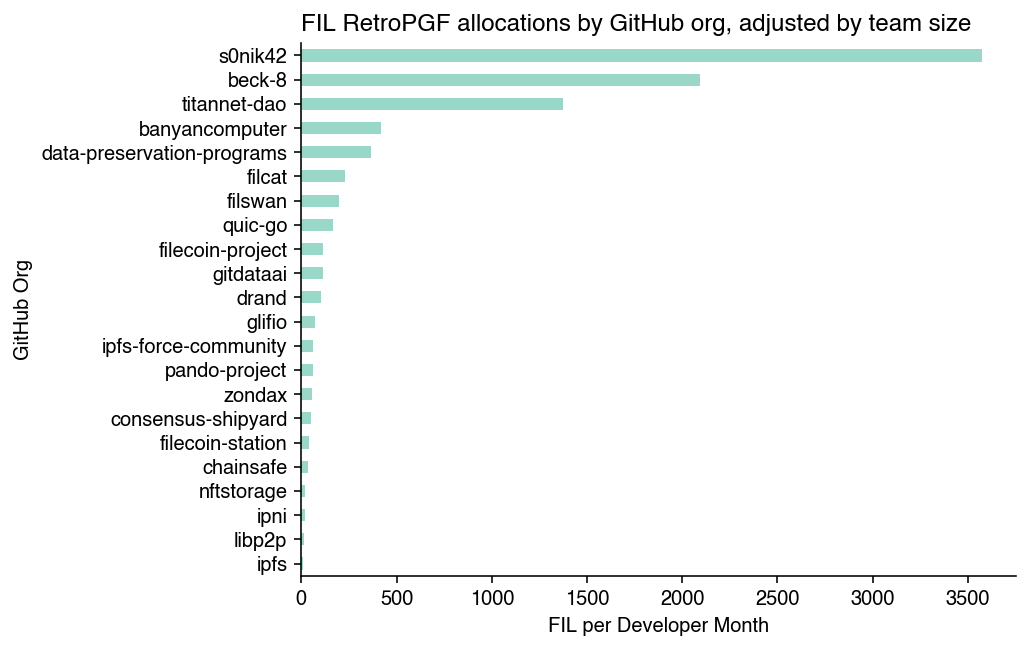

In [25]:
f = (
    sankey_df.groupby('GitHub Org')['Funding Share'].sum()
    / sankey_df.groupby('GitHub Org')['Developers Share'].sum()
).sort_values().dropna().head(22).plot(kind='barh', color=COLOR2)

f.set_xlabel('FIL per Developer Month')
f.set_title('FIL RetroPGF allocations by GitHub org, adjusted by team size', loc='left')